In [0]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


factbook\ (1).csv  factbook.csv  factbook_sintese.csv  sample_data


In [0]:
#from google.colab import files
#files.upload()

In [0]:
# Obtido do Banco Mundial
df=pd.read_csv('WordBank1.csv')

In [0]:
df.dtypes

Time             object
CountryName      object
CountryCode      object
Literacy         object
Internetuse      object
SecureServers    object
GDPCapita        object
dtype: object

In [0]:
df.loc[:,'Literacy']=pd.to_numeric(df['Literacy'], errors='coerce')
df.loc[:,'Internetuse']=pd.to_numeric(df['Internetuse'], errors='coerce')
df.loc[:,'SecureServers']=pd.to_numeric(df['SecureServers'], errors='coerce')
df.loc[:,'GDPCapita']=pd.to_numeric(df['GDPCapita'], errors='coerce')

In [0]:
XY=df.dropna()

In [0]:
XY.head()

,Time,CountryName,CountryCode,Literacy,Internetuse,SecureServers,GDPCapita
799,2010,Argentina,ARG,98.95497,45.00,24.936997,10276.260500
801,2010,Aruba,ABW,96.82264,62.00,88.522559,23512.602600
804,2010,Azerbaijan,AZE,99.77114,46.00,2.540221,5842.805784
818,2010,Brazil,BRA,90.37918,40.65,28.095045,11224.154080
826,2010,Cameroon,CMR,71.29051,4.30,0.350517,1309.122208


In [0]:
y=XY['Internetuse']

In [0]:
X=XY[['Literacy','SecureServers','GDPCapita']]

In [0]:

X1=sm.add_constant(X)
model = sm.OLS(y,X1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Internetuse   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     570.4
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          6.44e-170
Time:                        08:10:49   Log-Likelihood:                -2126.6
No. Observations:                 565   AIC:                             4261.
Df Residuals:                     561   BIC:                             4278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -32.2335      2.415    -13.345      0.000     -36.978     -27.489
Literacy          0.7202      0.031     23.390      0.000       0.660       0.781
SecureServers     0.0012      0.001      2.385      0.017       0.000       0.002
GDPCapita         0.0008   5.41e-05     15.593      0.000       0.001       0.001
==============================================================================
Omnibus:                       15.167   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.294
Skew:                           0.118   Prob(JB):                     7.18e-07
Kurtosis:                       4.070   Cond. No.                     7.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
df.corr(method='spearman')

,Literacy,Internetuse,SecureServers,GDPCapita
Literacy,1.000000,0.695178,0.682225,0.736825
Internetuse,0.695178,1.000000,0.905294,0.796890
SecureServers,0.682225,0.905294,1.000000,0.827992
GDPCapita,0.736825,0.796890,0.827992,1.000000


In [0]:
x=XY['GDPCapita']

In [0]:
x1=sm.add_constant(x)
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Internetuse   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     590.9
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           8.78e-90
Time:                        08:11:05   Log-Likelihood:                -2319.0
No. Observations:                 565   AIC:                             4642.
Df Residuals:                     563   BIC:                             4651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6196      0.787     28.735      0.000      21.073      24.166
GDPCapita      0.0014   5.92e-05     24.308      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                3.877
Skew:                           0.195   Prob(JB):                        0.144
Kurtosis:                       3.109   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
type(x)

pandas.core.series.Series

In [0]:
type(y)

pandas.core.series.Series

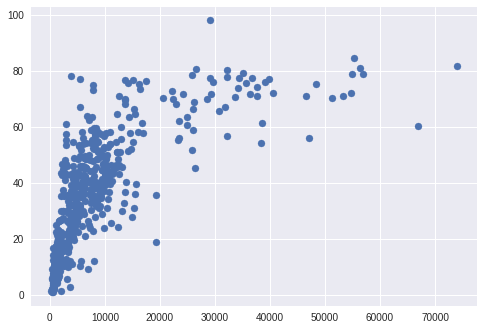

In [0]:

plt.scatter(x,y)


In [0]:
import numpy as np
logx=np.log(x)
logy=np.log(y)

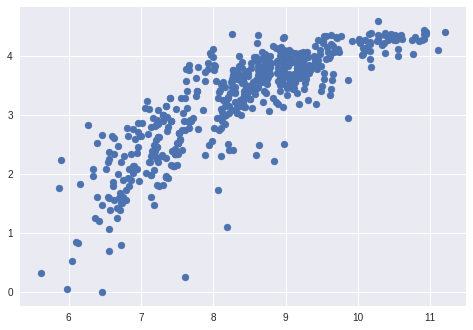

In [0]:
plt.scatter(logx,logy)

In [0]:
x1=sm.add_constant(logx)
model = sm.OLS(logy,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Internetuse   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          2.10e-151
Time:                        08:12:32   Log-Likelihood:                -360.73
No. Observations:                 565   AIC:                             725.5
Df Residuals:                     563   BIC:                             734.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0832      0.147    -14.151      0.000      -2.372      -1.794
GDPCapita      0.6357      0.017     36.688      0.000       0.602       0.670
==============================================================================
Omnibus:                       97.401   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.303
Skew:                          -0.865   Prob(JB):                     3.65e-56
Kurtosis:                       5.802   Cond. No.                         65.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""